## Sample exploration of the data

In [42]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from fitter import Fitter

#### <span style="color:#bbffff">Load data</span>

In [43]:
with open('data/output/test_out.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df = df[df['size'] != -1]
df = df[df['review_ratio'] != 0]

print(f'{df.shape= }')
df.head()

df.shape= (30, 4)


,name,appid,size,review_ratio
0,People Playground,1118200,0.35,0.989350
1,Half-Life 2,220,6.50,0.975093
2,Portal 2,620,8.00,0.987946
3,The Stanley Parable,221910,3.00,0.924364
4,The Talos Principle,257510,5.00,0.954889


#### <span style="color:#bbffff">Data plot</span>

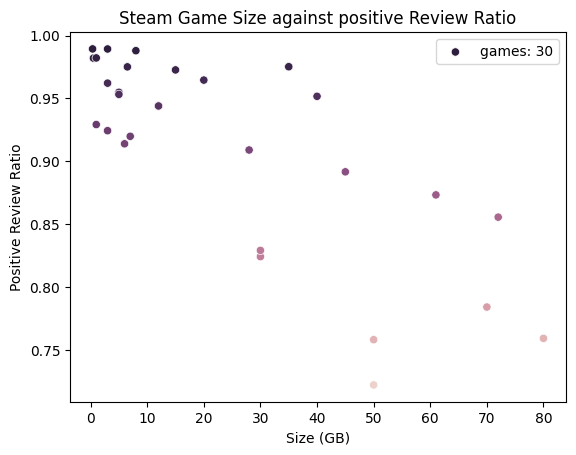

In [44]:
sns.scatterplot(data=df, x='size', y='review_ratio', hue='review_ratio',
                legend=False)
plt.title('Steam Game Size against positive Review Ratio')
plt.xlabel('Size (GB)')
plt.ylabel('Positive Review Ratio')
plt.legend(labels=[f'games: {len(df["review_ratio"])}'])
plt.show()

#### <span style="color:#bbffff">Numerical analysis</span>

Simple number summary

In [45]:
pd.DataFrame([df['size'].describe(), df['review_ratio'].describe()])

,count,mean,std,min,25%,50%,75%,max
size,30.0,24.478333,24.262898,0.35000,5.000000,13.500000,38.750000,80.00000
review_ratio,30.0,0.913283,0.077680,0.72233,0.877928,0.944022,0.974485,0.98935


Linear regression

In [46]:
corr = ols('review_ratio ~ size', data=df).fit()
corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_ratio   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     35.94
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.86e-06
Time:                        20:33:31   Log-Likelihood:                 46.981
No. Observations:                  30   AIC:                            -89.96
Df Residuals:                      28   BIC:                            -87.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9720      0.014     71.029      0.000       0.944       1.000
size          -0.0024      0.000     -5.995      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        1.782   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.101
Skew:                          -0.468   Prob(JB):                        0.577
Kurtosis:                       3.065   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='size', ylabel='review_ratio'>

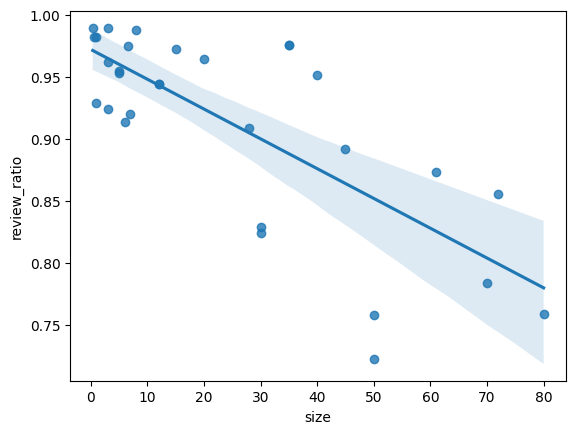

In [47]:
sns.regplot(data=df, x='size', y='review_ratio')

#### <span style="color:#bbffff">Distribution fit</span>

In [48]:
### Takes time.
# f = Fitter(df['review_ratio'])
# f.fit()
# f.summary()

#### <span style="color:#bbffff">Histograms</span>

Text(0.5, 1.0, 'Distribution of Review Ratios')

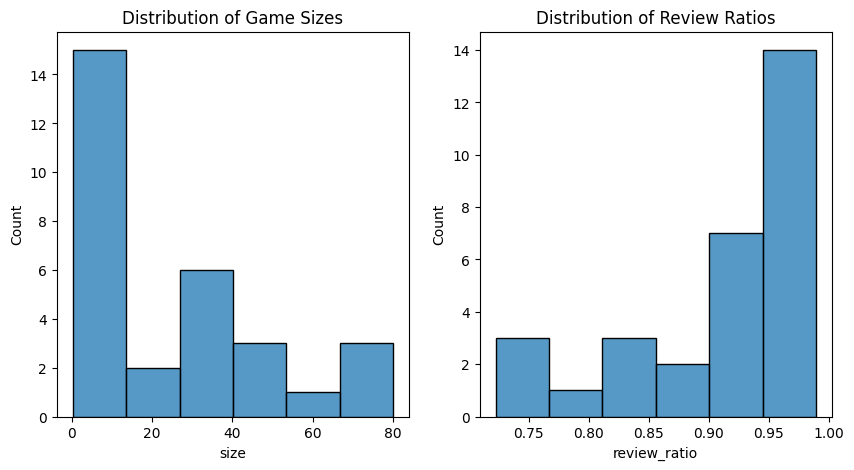

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='size', ax=ax[0])
ax[0].set_title('Distribution of Game Sizes')
sns.histplot(data=df, x='review_ratio', ax=ax[1])
ax[1].set_title('Distribution of Review Ratios')

#### <span style="color:#bbffff">QQ plot</span>
Compares the distribution of the data to a normal distribution.

Here, the data, as well as the residuals (standardized) are compared, as they are expected to be normally distributed.

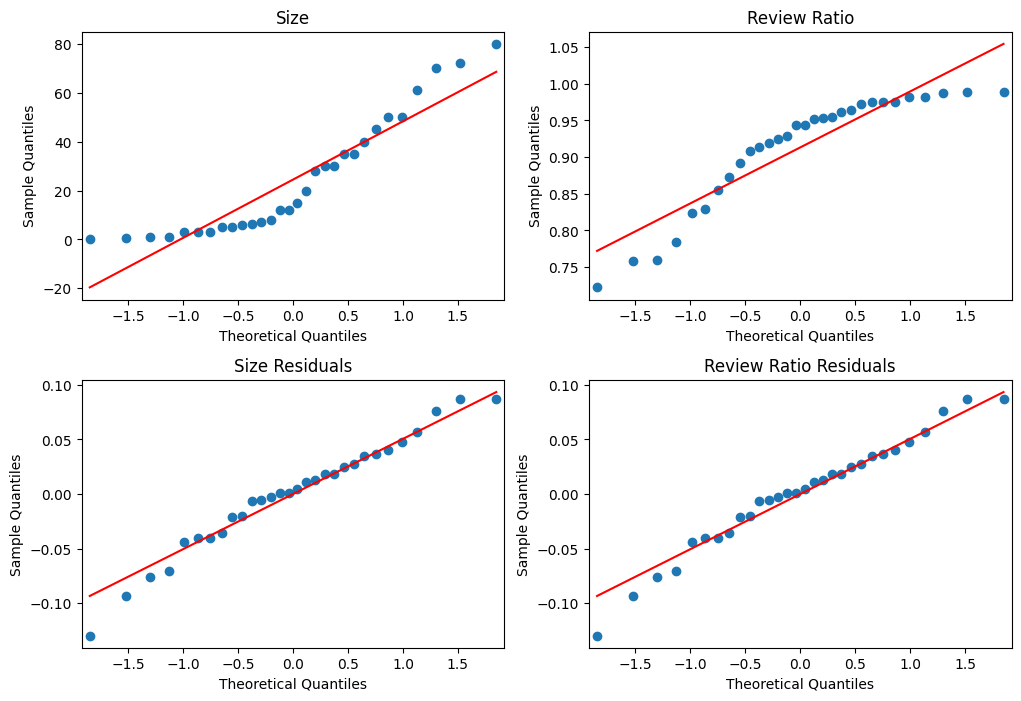

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), )
fig.subplots_adjust(hspace=0.3)

# Data
for i in range(1, 3):
    qqplot(df[['size', 'review_ratio'][i-1]], line='s', ax=ax[0][i-1])
    ax[0][i-1].set_title(['Size', 'Review Ratio'][i-1])

# Residuals
for i in range(1, 3):
    qqplot(corr.resid, line='s', ax=ax[1][i-1])
    ax[1][i-1].set_title(['Size', 'Review Ratio'][i-1] + ' Residuals')